<a href="https://colab.research.google.com/github/AI-Lab-2025-2-3rd/ai-project-atlanta/blob/changyo/3113%EC%A0%95%EC%B0%AC%EA%B5%90_1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80(Linear_Regression)%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%89%B4%EB%9F%B0_%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<이번 수업에서 다루는 내용><br>
당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델을 만들기<br>
이를 위해 선형 회귀를 위한 뉴런을 만들 것입니다.<br>
선형 회귀에서 예측값과 실제값의 차이(오차)를 최소화하기 위해 경사하강법을 사용하겠습니다.

In [ ]:
# 사이킷런의 당뇨병 환자의 데이터셋
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
# 데이터셋의 크기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
diabetes.feature_names # 나이, 성별, 체질량지수, 평균혈압, 혈청측정값

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [ ]:
diabetes.target[:3]

array([151.,  75., 141.])

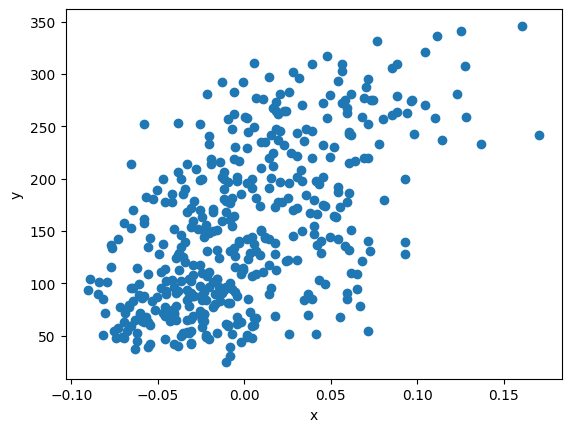

In [ ]:
import matplotlib.pyplot as plt

# 세 번째 특성(feature)과 타깃 데이터로 그린 산점도
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#훈련 데이터 준비하기
x = diabetes.data[:, 2]
y = diabetes.target

경사하강법<br>
함수의 기울기를 구하고 경사의 반대 방향으로 계속 이동시켜 극값에 이를 때까지 반복시키는 것<br>
어떤 손실함수(loss function)가 정의되었을 때 손실 함수의 값이 최소가 되는 지점을 찾아가는 방법<br><br>
손실함수는 타깃값과 예상한 값의 차이를 함수로 정의한 것

#1. 예측값으로 모델 찾기

In [ ]:
# w와 b 초기화
w = 1.0
b = 1.0

In [ ]:
# 첫번째 샘플 x[0]에 대한 y_hat(y[0] 예측값) 계산
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [ ]:
# 실제 y[0]값
print(y[0])

151.0


In [ ]:
# w(가중치) 업데이트
# 먼저 w를 0.1 증가시키고 y_hat의 변화량을 관찰
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


In [ ]:
# w가 0.1 증가했을 때 y_hat이 얼마나 증가했는지 계산
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)  # x[0]에 대한 w의 변화율

0.06169620651868429


In [ ]:
# w_rate == x[0]
print(x[0])

0.061696206518683294


In [ ]:
# 변화율로 가중치(w) 업데이트
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [ ]:
# b(절편) 업데이트
# b를 0.1만큼 증가시켜 y_hat이 얼마나 증가했는지 계산
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [ ]:
# 변화율 계산
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate) # x[0]에 대한 b의 변화율

1.0


In [ ]:
# 변화율로 b 업데이트
b_new = b + 1
print(b_new)

2.0


- y_hat이 y에 한참 미치지 못 하는 값인 경우, w와 b를 더 큰 폭으로 수정할 수 없습니다.(위에서 변화율만큼 수정했지만 특별한 기준을 정하기가 어려움)<br>
- y_hat이 y보다 커지면 y_hat을 감소시키지 못합니다.<br><br>
이런 상황에 적합하게 대처하지 못합니다.

#2. 오차 역전파(backpropagation)
(:y_hat과 y의 차이를 이용해 w와 b를 업데이트함)을 이용해 w와 b를 더 능동적으로 업데이트해봅시다.



In [ ]:
# 오차와 변화율을 곱하여 가중치 업데이트
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [ ]:
# x[1](두 번째 샘플)을 이용해 오차를 구하고 새로운 w, b 구함
y_hat = x[1] * w_new + b_new  # 예측값
err = y[1] - y_hat  # 오차
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [ ]:
# 모든 샘플을 위와 같은 방식으로 가중치와 절편 업데이트
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


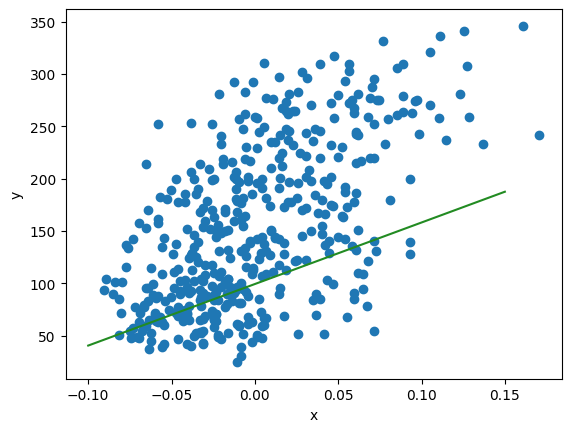

In [ ]:
# 회귀선 확인(위의 모델이 전체 데이터 세트를 잘 표현할까요?)
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color = 'forestgreen')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

보통 경사하강법에서 주어진 훈련 데이터로 학습을 여러 번 반복하는데, 전체 훈련 데이터를 모두 이용해 한 단위의 작업을 진행하는 것을 에포크(epoch)라고 합니다.

In [ ]:
# 에포크 여러 번 시도해보기(100번)
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


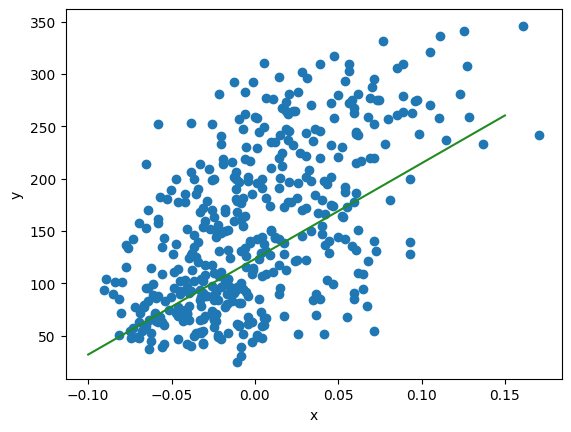

In [ ]:
# 결과 확인
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color = 'forestgreen')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y_hat = 913.6*x + 123.4

In [ ]:
# 모델로 예측해보기
# 입력 데이터 x에 없었던 새로운 데이터가 발생했다고 가정
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


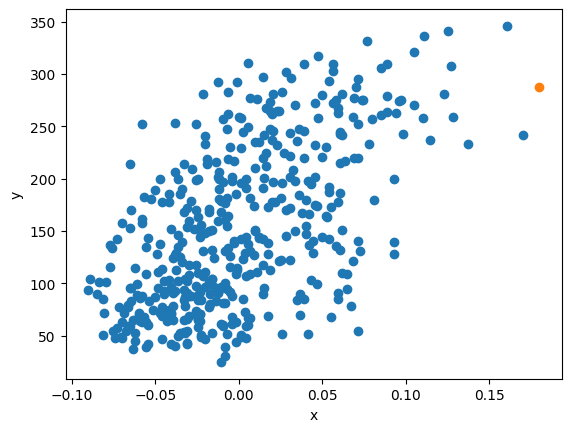

In [ ]:
# 예측한 값을 산점도 위에 표시
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#3. 경사하강법 알고리즘을 Neuron이라는 클래스로 만들어보기

In [ ]:
class Neuron:

    def __init__(self):
        self.w = 1.0     # 가중치를 초기화
        self.b = 1.0     # 절편을 초기화

    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트
        b_grad = 1 * err    # 절편에 대한 그래디언트
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복(1에포크)
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

In [ ]:
neuron = Neuron()
neuron.fit(x, y)

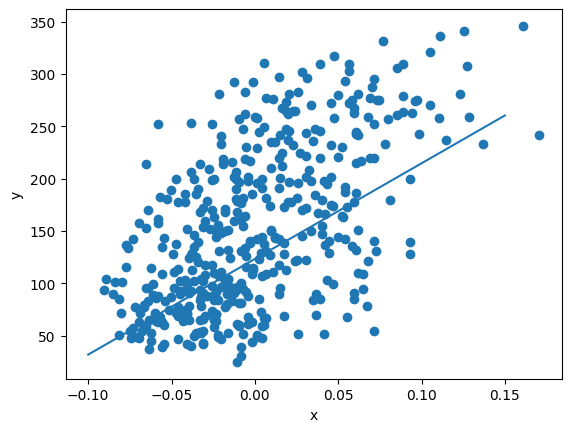

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()